This notebook generates a graph of the Donegal road network. The graph is created from OpenStreetMap data using osmnx and saved as a graphml file. 

In [2]:
import osmnx as ox
import networkx as nx
from datetime import datetime

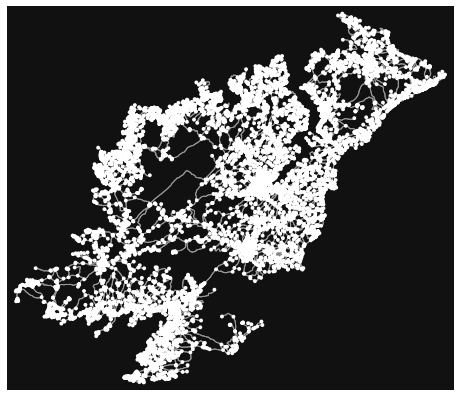

In [3]:
G = ox.graph_from_place("Donegal, Ireland", network_type="drive")
graph_file = "donegal_osm.graphml"
ox.save_graphml(G, filepath=graph_file)
fig, ax = ox.plot_graph(G, save=True)

The graph will now be simplified by removing edges that represent residential roads less that 500m. This will remove areas such housing estates which the suggested bus routes will not pass through.

In [5]:
G = ox.load_graphml(graph_file)
len(G.edges)

30548

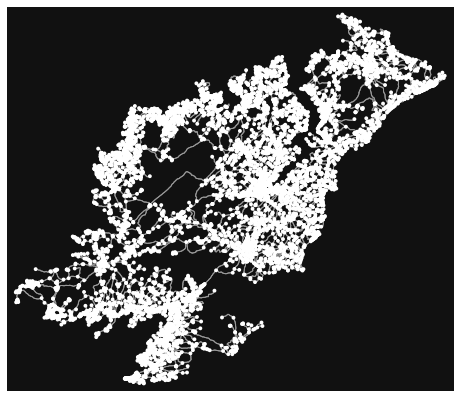

In [8]:
G = ox.load_graphml(graph_file)

# to geodataframe, access edge info.
edges = ox.graph_to_gdfs(G, nodes=False, edges=True)

# removing residential roads < 0.5km
short_residential_roads = edges[(edges["highway"] == "residential") &
                                (edges["length"] < 500)]
edge_nodes = short_residential_roads[["u", "v"]]
node_tuples = list(edge_nodes.itertuples(index=False, name=None))
G.remove_edges_from(node_tuples)

# remove unconnected nodes
G.remove_nodes_from(list(nx.isolates(G)))

ox.save_graphml(G, filepath=graph_file)

fig, ax = ox.plot_graph(G, save=True)
#start_time = datetime.now()
#print(f"start time: {start_time}")
#paths = list(nx.all_simple_paths(G, source=811393029, target=6988276348, cutoff=30))

#end_time = datetime.now()
#print(f"end time: {end_time}")
#fig, ax = ox.plot_graph(G, save=True)

In [9]:
len(G.edges)

21928

A reduction of 8620 edges which will help when running pathfinding algorithm later